In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.14.0


In [2]:
#necessary imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint


In [3]:
#import dataset
df = pd.read_csv('./data/dataset.csv')
df.head()

,Unnamed: 0,home_last_3_P,home_last_3_OppP,home_last_3_FG,home_last_3_FGA,home_last_3_FG%,home_last_3_3P,home_last_3_3PA,home_last_3_3P%,home_last_3_FT,...,away_last_50_DeFG%,away_last_50_DTOV%,away_last_50_DDRB%,away_last_50_DFT/FGA,away_last_50_W,away_last_50_H,Date,Home_Team,Away_Team,Home_Team_Won
0,0,112.33,106.33,42.33,84.67,0.50,11.33,31.33,0.36,16.33,...,0.51,12.67,76.90,0.18,41.0,27.0,2022-02-03,ATL,PHO,True
1,0,112.00,104.33,44.00,94.67,0.47,8.67,29.67,0.29,15.33,...,0.52,11.68,77.64,0.17,32.0,25.0,2022-02-10,ATL,MIL,True
2,0,125.00,120.00,46.67,90.67,0.51,14.67,37.33,0.39,17.00,...,0.56,12.00,78.43,0.20,20.0,28.0,2022-02-14,ATL,POR,False
3,0,119.00,109.67,42.67,89.33,0.48,15.33,38.33,0.40,18.33,...,0.51,12.66,78.26,0.20,34.0,26.0,2022-02-24,ATL,GSW,False
4,0,117.33,110.33,43.00,87.00,0.49,13.67,38.67,0.35,17.67,...,0.52,12.32,78.22,0.19,28.0,25.0,2022-02-27,ATL,DAL,False


In [4]:
#We want clean the data and split up the input and output
target_column = "Home_Team_Won"
unneeded_columns = ["Date",	"Home_Team", "Away_Team"]

#remove first column from dataset
df = df.drop(df.columns[[0]],axis = 1)

#remove unneed_columns. These are columns that are in our dataset, but we don't want to feed into the model
#this is because they are categorical, we're only feeding our model numerical data
clean_df = df.drop(columns=unneeded_columns, axis=1)

# making new data frame with dropped NA values
clean_df = clean_df.dropna(axis=0, how='any')

#get the output rows of the dataset
output_rows = clean_df[target_column]

#remove output rows from the dataset
clean_df = clean_df.drop(columns=target_column, axis=1)

clean_df.head()

,home_last_3_P,home_last_3_OppP,home_last_3_FG,home_last_3_FGA,home_last_3_FG%,home_last_3_3P,home_last_3_3PA,home_last_3_3P%,home_last_3_FT,home_last_3_FTA,...,away_last_50_OeFG%,away_last_50_OTOV%,away_last_50_OORB%,away_last_50_OFT/FGA,away_last_50_DeFG%,away_last_50_DTOV%,away_last_50_DDRB%,away_last_50_DFT/FGA,away_last_50_W,away_last_50_H
0,112.33,106.33,42.33,84.67,0.50,11.33,31.33,0.36,16.33,22.67,...,0.54,11.55,22.63,0.18,0.51,12.67,76.90,0.18,41.0,27.0
1,112.00,104.33,44.00,94.67,0.47,8.67,29.67,0.29,15.33,19.00,...,0.54,11.64,23.25,0.19,0.52,11.68,77.64,0.17,32.0,25.0
2,125.00,120.00,46.67,90.67,0.51,14.67,37.33,0.39,17.00,24.00,...,0.52,11.80,21.96,0.20,0.56,12.00,78.43,0.20,20.0,28.0
3,119.00,109.67,42.67,89.33,0.48,15.33,38.33,0.40,18.33,23.67,...,0.55,13.17,23.19,0.18,0.51,12.66,78.26,0.20,34.0,26.0
4,117.33,110.33,43.00,87.00,0.49,13.67,38.67,0.35,17.67,23.00,...,0.54,10.83,21.59,0.19,0.52,12.32,78.22,0.19,28.0,25.0


In [5]:
#we cleaned up our data, now we are going to split it and get it ready to feed into the model
X_train, X_test, y_train, y_test = train_test_split(clean_df, output_rows, test_size=0.25, random_state=0)

#now we have our training and testing dataset
print('X_train:',np.shape(X_train))
print('y_train:',np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))

X_train: (1223, 228)
y_train: (1223,)
X_test: (408, 228)
y_test: (408,)


In [6]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))


Accuracy: 0.9877450980392157
Precision: 1.0
Recall: 0.9785407725321889


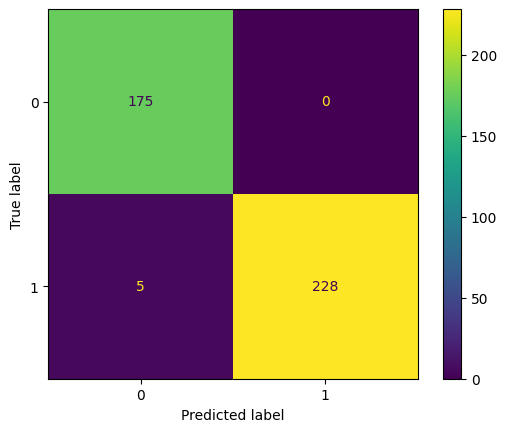

In [7]:
#e valuate the results
y_pred = clf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();
